<a href="https://colab.research.google.com/github/CodesByNehaal/TASK1_REDx/blob/main/Classifiers_on_strokes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

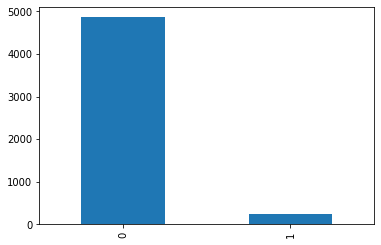

In [ ]:
#we have two set of output for strokes column in the df. visualising it.

df["stroke"].value_counts().plot(kind="bar")

In [ ]:
#let's check for strokes with respect to gender

pd.crosstab(df.gender, df.stroke)

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


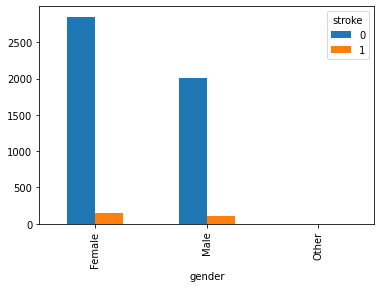

In [ ]:
pd.crosstab(df.gender, df.stroke).plot(kind="bar")

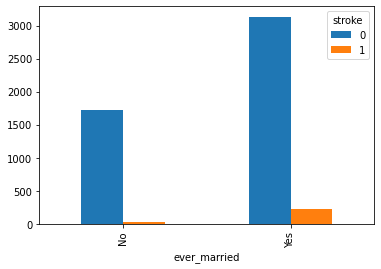

In [ ]:
#strokes with respeect to marriage

pd.crosstab(df['ever_married'], df['stroke']).plot(kind="bar")

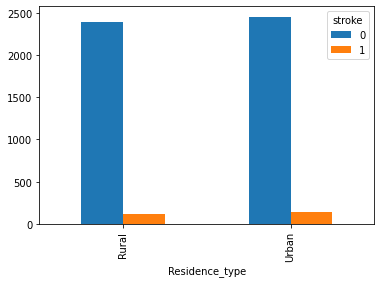

In [ ]:
#Residence_type with respect to stroke

pd.crosstab(df["Residence_type"], df["stroke"]).plot(kind="bar")

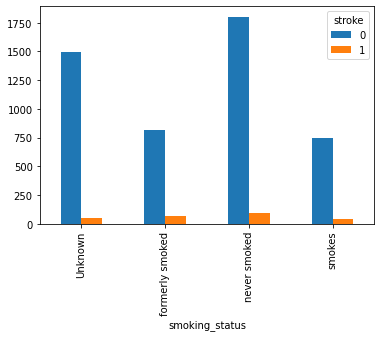

In [ ]:
#let's see strokes with respect to smoking status

pd.crosstab(df["smoking_status"], df["stroke"]).plot(kind="bar")

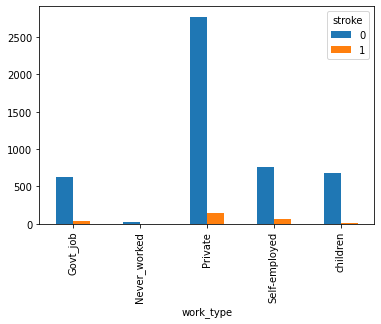

In [ ]:
#surprisingly, never smoked are affected by stroke higher than other categories. 
#but it is only bcoz the dataset contains never smoked data more than that of other data

#checking for work type wrt to stroke

pd.crosstab(df["work_type"], df["stroke"]).plot(kind="bar")

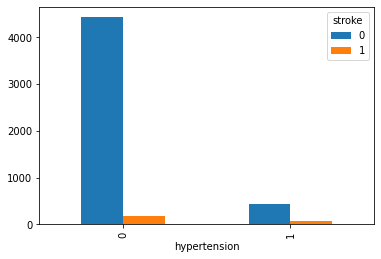

In [ ]:
#checking for hyper tension wrt stroke

pd.crosstab(df["hypertension"], df["stroke"]).plot(kind="bar")

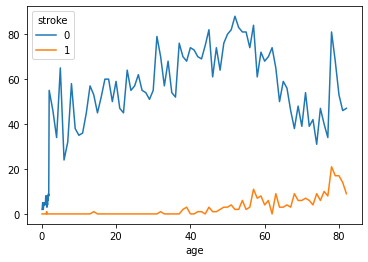

In [ ]:
#does age play a role for strokes as well?

pd.crosstab(df["age"], df["stroke"]).plot(kind="line")

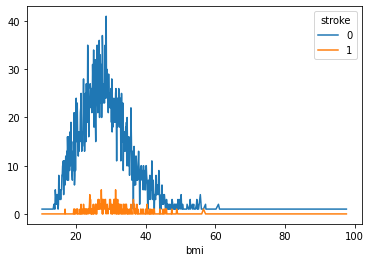

In [ ]:
#we can see that aged people are more prone to strokes

pd.crosstab(df["bmi"], df["stroke"]).plot(kind="line")


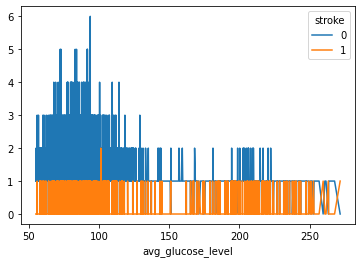

In [ ]:

pd.crosstab(df["avg_glucose_level"], df["stroke"]).plot(kind="line")


In [ ]:
#as we saw in the visualisations above, alot of factors come into picture to predict the probability of strokes

#let's convert all the categorical data into numerical data

df['gender'] = np.where((df.gender=='Male'),'0',df.gender)

In [ ]:
df['gender'] = np.where((df.gender=='Female'),'1',df.gender)
df['gender'] = np.where((df.gender=='Other'),'2',df.gender)

df["gender"] = df["gender"].astype('int64')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [ ]:

x = df["bmi"].mean()

df["bmi"].fillna(x, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [ ]:
df['ever_married'] = np.where((df.ever_married=='Yes'),'0',df.ever_married)


In [ ]:
df['ever_married'] = np.where((df.ever_married=='No'),'1',df.ever_married)


In [ ]:
df["ever_married"] = df["ever_married"].astype('int64')

In [ ]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,0,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,0,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,0,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df['Residence_type'] = np.where((df.Residence_type=='Urban'),'0',df.Residence_type)


In [ ]:
df['Residence_type'] = np.where((df.Residence_type=='Rural'),'1',df.Residence_type)


In [ ]:
df["Residence_type"] = df["Residence_type"].astype('int64')

In [ ]:
df['work_type'] = np.where((df.work_type=='Private'),'0',df.work_type)
df['work_type'] = np.where((df.work_type=='Self-employed'),'1',df.work_type)
df['work_type'] = np.where((df.work_type=='Govt_job'),'2',df.work_type)
df['work_type'] = np.where((df.work_type=='children'),'3',df.work_type)
df['work_type'] = np.where((df.work_type=='Never_worked'),'4',df.work_type)

df["work_type"] = df["work_type"].astype('int64')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,0,1,1,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,0,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,0,0,1,166.29,25.600000,formerly smoked,0


In [ ]:
df['smoking_status'] = np.where((df.smoking_status == 'formerly smoked'),'0',df.smoking_status)
df['smoking_status'] = np.where((df.smoking_status == 'never smoked'),'1',df.smoking_status)
df['smoking_status'] = np.where((df.smoking_status == 'smokes'),'2',df.smoking_status)
df['smoking_status'] = np.where((df.smoking_status == 'Unknown'),'3',df.smoking_status)

In [ ]:



df["smoking_status"] = df["smoking_status"].astype('int64')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,37544,0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
corr_matrix = df.corr()
corr_matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,-0.001406,0.003538,0.003550,-0.001296,-0.013690,-0.018030,0.001403,0.001092,0.002999,-0.018551,0.006388
gender,-0.001406,1.000000,0.027300,-0.021390,-0.085749,-0.029366,-0.066212,-0.005529,-0.054213,0.025110,-0.039693,-0.009200
age,0.003538,0.027300,1.000000,0.276398,0.263796,-0.679125,-0.413270,-0.014180,0.238171,0.325942,-0.375845,0.245257
hypertension,0.003550,-0.021390,0.276398,1.000000,0.108306,-0.164243,-0.075097,0.007913,0.174474,0.160189,-0.129012,0.127904
heart_disease,-0.001296,-0.085749,0.263796,0.108306,1.000000,-0.114644,-0.058263,-0.003092,0.161857,0.038899,-0.064671,0.134914
ever_married,-0.013690,-0.029366,-0.679125,-0.164243,-0.114644,1.000000,0.375944,0.006261,-0.155068,-0.335705,0.303694,-0.108340
work_type,-0.018030,-0.066212,-0.413270,-0.075097,-0.058263,0.375944,1.000000,-0.014573,-0.068135,-0.341973,0.307774,-0.058224
Residence_type,0.001403,-0.005529,-0.014180,0.007913,-0.003092,0.006261,-0.014573,1.000000,0.004946,0.000120,-0.004656,-0.015458
avg_glucose_level,0.001092,-0.054213,0.238171,0.174474,0.161857,-0.155068,-0.068135,0.004946,1.000000,0.168751,-0.097732,0.131945
bmi,0.002999,0.025110,0.325942,0.160189,0.038899,-0.335705,-0.341973,0.000120,0.168751,1.000000,-0.230553,0.038947


In [ ]:
#data visualisation and encoding done

In [ ]:
df.drop(columns=['id'],inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,1,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,1,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
#we have an imbalance between strokes and no strokes data. hence, we need to balance the sample dataset. 

df.drop(df[df.work_type == 3].index, inplace = True) #delete the records of children as they are least prone to Strokes. 


number with stroke:  247
number without stroke:  4176


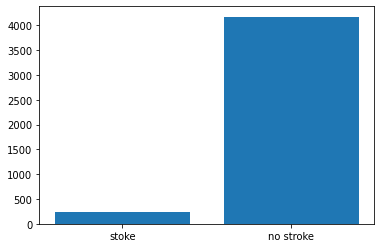

In [ ]:

#split the data into those with stroke and without stroke
no_stroke = df[df['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column 

yes_stroke = df[df['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())

In [ ]:
#we still have imbalance.
#hence, we take sample dataset of no strokes data and strokes data in the ratio 3:1
#undersampling
class_no_stroke_extract = no_stroke.sample(750) 
sampled_data = pd.concat([class_no_stroke_extract, yes_stroke], axis=0)

In [ ]:




sampled_data = sampled_data.sample(frac = 1)  #reshuffling data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


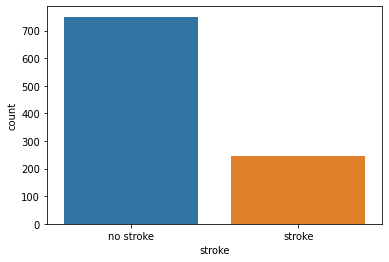

In [ ]:
g = sns.countplot(sampled_data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()


In [ ]:
#we will now select only the important features amongst all.
X = sampled_data[['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level','smoking_status']] 
y = sampled_data['stroke']

In [ ]:
#splitting data for test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3) 

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000) #model
log_reg_model.fit(X_train,y_train) 

train_predictions_log = log_reg_model.predict(X_train) #train the model
test_predictions_log = log_reg_model.predict(X_test) #test the model

In [ ]:
print('Logistic regression model evaluation:')
print('Precision: ', precision_score(y_test,test_predictions_log))
print('Recall: ', recall_score(y_test,test_predictions_log))
print('\nAccuracy: ',accuracy_score(y_test,test_predictions_log))
print('f1_score: ', f1_score(y_test,test_predictions_log)) 

Logistic regression model evaluation:


NameError: ignored


**KNN**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:


len(x_train), len(x_test), len(y_train), len(y_test)

(697, 300, 697, 300)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_val, Target = sm.fit_resample(x_train, y_train)

In [ ]:


classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(X_val, Target)  

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred= classifier.predict(x_test)  
y_pred[0:100]


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:



cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[165,  53],
       [ 34,  48]])

In [ ]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       218
           1       0.48      0.59      0.52        82

    accuracy                           0.71       300
   macro avg       0.65      0.67      0.66       300
weighted avg       0.73      0.71      0.72       300



In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_val, Target)  

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test)  
y_pred[0:100]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[160,  58],
       [ 32,  50]])

In [ ]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       218
           1       0.46      0.61      0.53        82

    accuracy                           0.70       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.73      0.70      0.71       300



In [ ]:
# Decision Tree Implementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import tree

In [ ]:
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

[Text(0.4565792657110022, 0.98, 'X[0] <= 0.091\ngini = 0.361\nsamples = 697\nvalue = [532, 165]'),
 Text(0.23064477106393275, 0.94, 'X[3] <= -1.55\ngini = 0.315\nsamples = 337\nvalue = [271, 66]'),
 Text(0.10403435553136152, 0.9, 'X[3] <= -1.888\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.09629226395693462, 0.86, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11177644710578842, 0.86, 'X[5] <= 0.608\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.10403435553136152, 0.82, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11951853868021532, 0.82, 'X[0] <= -2.197\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.11177644710578842, 0.78, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12726063025464224, 0.78, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35725518659650396, 0.9, 'X[0] <= -0.169\ngini = 0.304\nsamples = 331\nvalue = [269, 62]'),
 Text(0.28095324502510133, 0.86, 'X[0] <= -0.481\ngini = 0.331\nsamples = 267\nvalue = [211, 56]'),
 Text(0.1825440

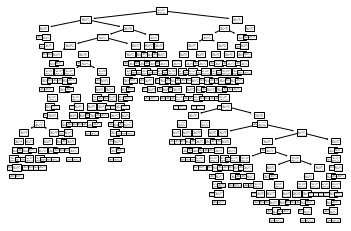

In [ ]:
tree.plot_tree(dt)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('F1 score: ', f1_score(y_test, predictions))

[[168  50]
 [ 59  23]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       218
           1       0.32      0.28      0.30        82

    accuracy                           0.64       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.62      0.64      0.63       300

F1 score:  0.29677419354838713


In [ ]:
#criterion: gini, entropy, log_loss     default: gini

dt = DecisionTreeClassifier(splitter='random',  max_depth=22, min_samples_split=2, min_samples_leaf=1, random_state=101)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [ ]:


print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))

[[162  56]
 [ 53  29]]

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       218
           1       0.34      0.35      0.35        82

    accuracy                           0.64       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.64      0.64      0.64       300

F1 Score:  0.34730538922155685


In [ ]:
#Random Forest Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rt = RandomForestClassifier(random_state=101)
rt.fit(X_train, y_train)
predictions = rt.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()
print('F1 score: ', f1_score(y_test, predictions))

[[215   3]
 [ 76   6]]

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       218
           1       0.67      0.07      0.13        82

    accuracy                           0.74       300
   macro avg       0.70      0.53      0.49       300
weighted avg       0.72      0.74      0.65       300


F1 score:  0.13186813186813187


In [ ]:
rf = RandomForestClassifier( max_depth=18, min_samples_split=2, min_samples_leaf=1, random_state=101)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print()
print('F1 score: ', f1_score(y_test, predictions))

[[214   4]
 [ 74   8]]

              precision    recall  f1-score   support

           0       0.74      0.98      0.85       218
           1       0.67      0.10      0.17        82

    accuracy                           0.74       300
   macro avg       0.70      0.54      0.51       300
weighted avg       0.72      0.74      0.66       300


F1 score:  0.1702127659574468
